# DAY 6

#### Inferential Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import copy

In [2]:
df = pd.read_csv("insurance (2).csv")

In [3]:
df.head(10) #1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info() # 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


 * data looks legit as all the statistics seem reasonable
 * looking at the age column, data looks representative of the true age distribution of the adult population.
 * charges column is the skewed, age, bmi and children are almost equal so we can get bell curve for those.
 * very few people have more than 2 children. 75% of the people have 2 or less children.
 * the claimed amount is highly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

In [12]:
sns.set() #setting the default seaborn style for our plots

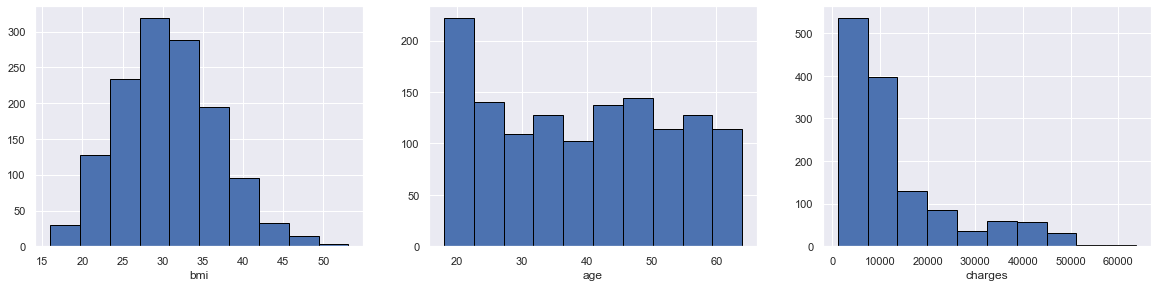

In [13]:
plt.figure(figsize= (20,15)) #Plots to see the distribution of the continuous features individually

plt.subplot(3,3,1)
plt.hist(df.bmi, edgecolor = 'black')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor = 'black')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, edgecolor = 'black')
plt.xlabel('charges')

plt.show()

* we can say that BMI has normally distributed than age, charges. 
* charges are more skewed.
* ages are uniformly distributed. 

In [14]:
checking_Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
checking_Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


from this also we can say that charges are highly skewed and bmi skew is very less age is uniformly distributed with skew.

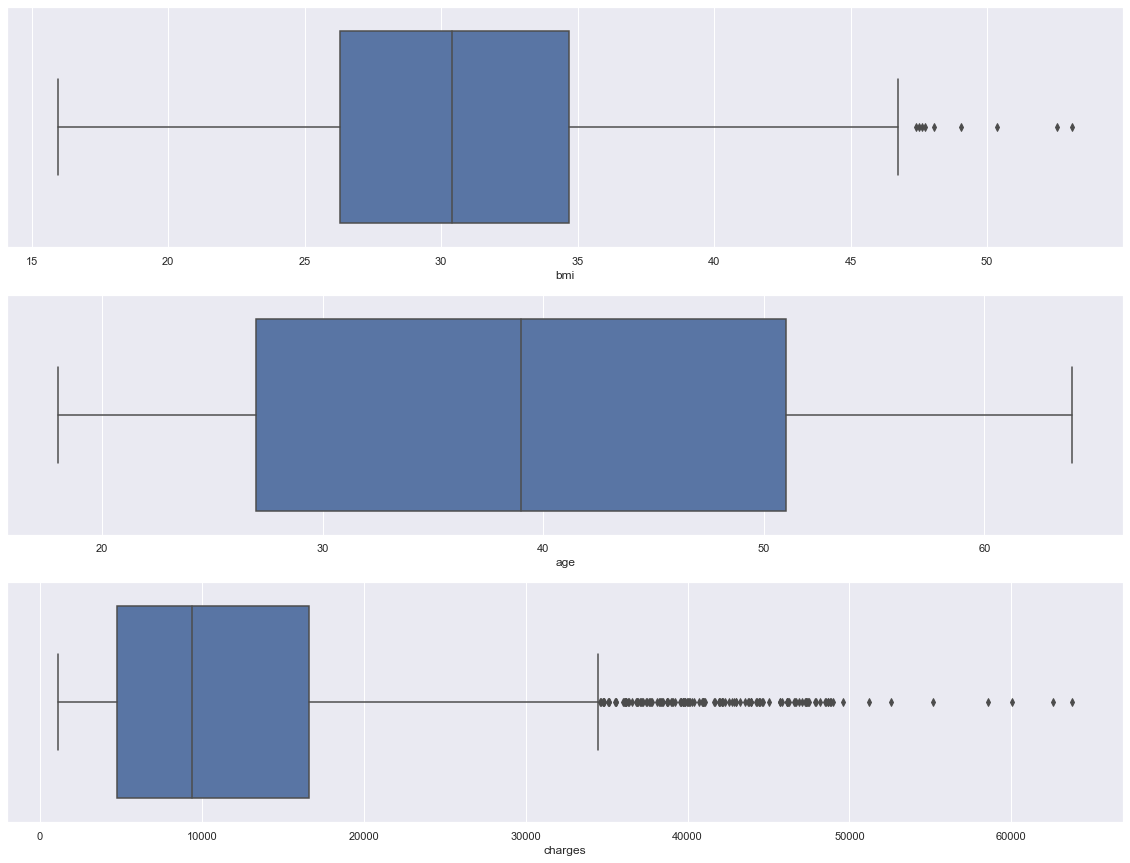

In [15]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi)

plt.subplot(3,1,2)
sns.boxplot(x= df.age)

plt.subplot(3,1,3)
sns.boxplot(x= df.charges)

plt.show()

* from above we cn say that there is no outliers in the age so it is uniformly distributed. and there are lot of outliers in the charges so highly skewed.

<AxesSubplot:xlabel='smoker', ylabel='count'>

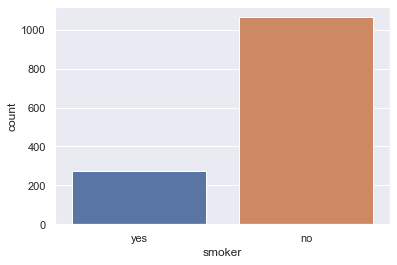

In [16]:
sns.countplot(x = 'smoker', data = df)


<AxesSubplot:xlabel='sex', ylabel='count'>

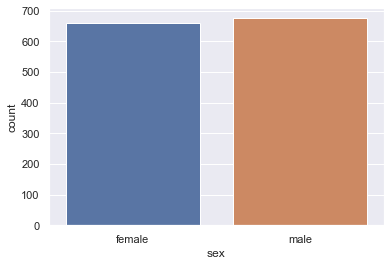

In [17]:
sns.countplot(x = 'sex', data = df)

<AxesSubplot:xlabel='region', ylabel='count'>

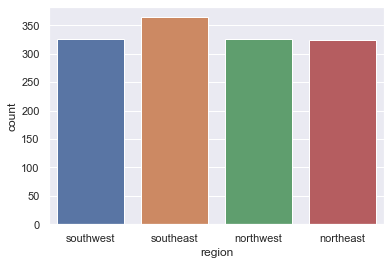

In [18]:
sns.countplot(x = 'region', data = df)

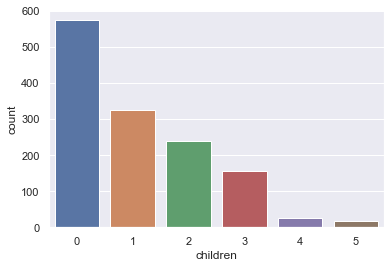

In [19]:
sns.countplot(x = 'children', data = df)
plt.show()

Text(0.5, 1.0, 'smoker distribution')

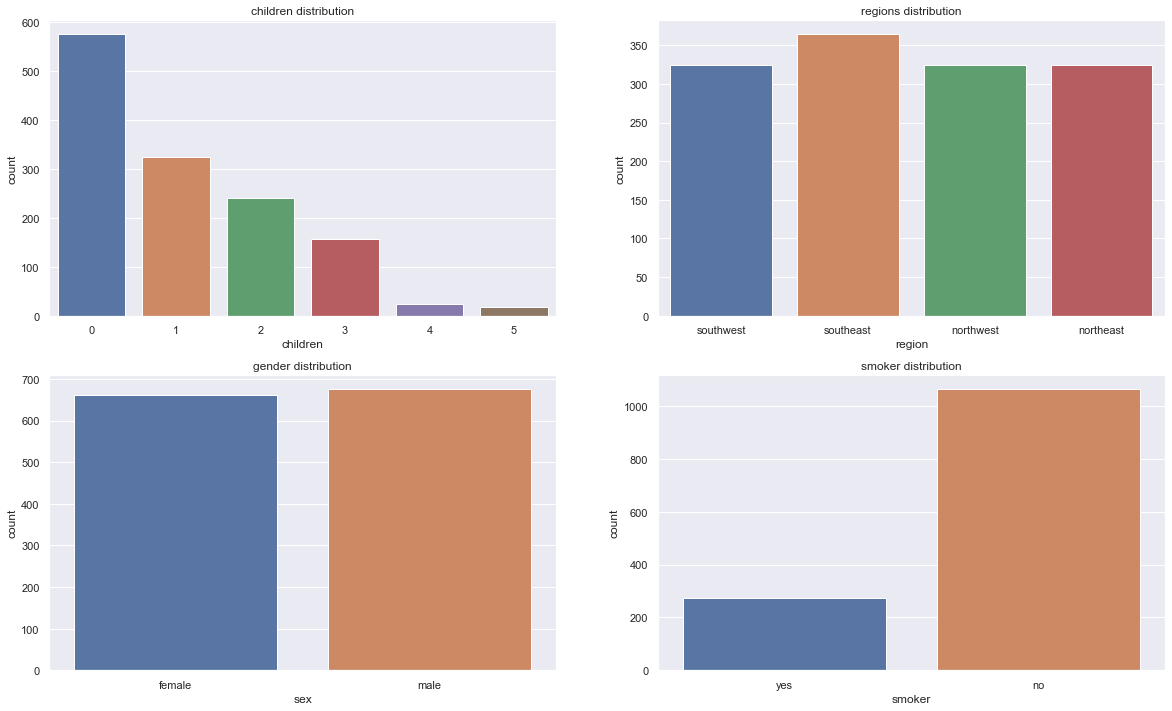

In [20]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(x = 'children', data = df)
plt.title('children distribution')

plt.subplot(4,2,2)
sns.countplot(x = 'region', data = df)
plt.title('regions distribution')

plt.subplot(4,2,3)
sns.countplot(x = 'sex', data = df)
plt.title('gender distribution')

plt.subplot(4,2,4)
sns.countplot(x = 'smoker', data = df)
plt.title('smoker distribution')

* more non-smokers than the smokers 
* Gender and regions are distributed evenly
* Most instances have less than 2 children and very few have 4 or 5 children

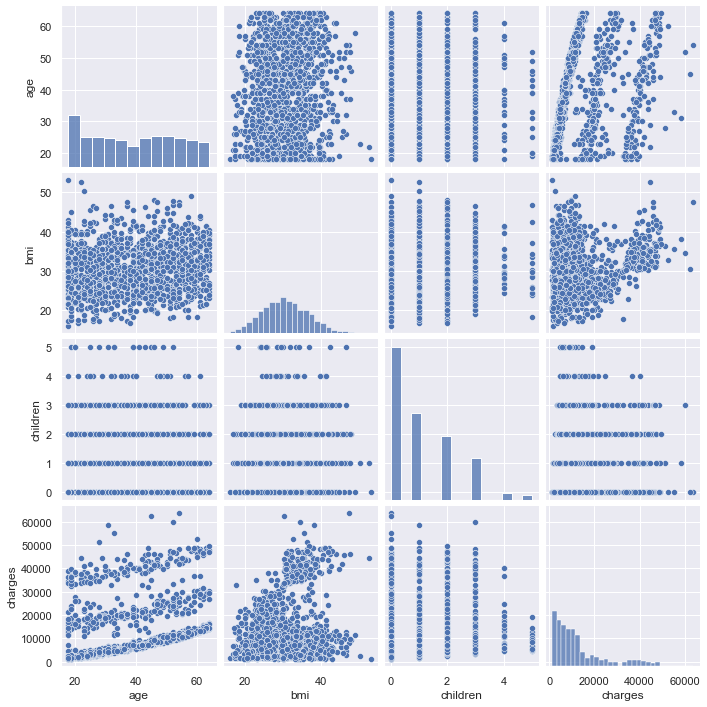

In [21]:
sns.pairplot(df)

### Do charges of people who smoke differ significantly from the people who don't?

In [22]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


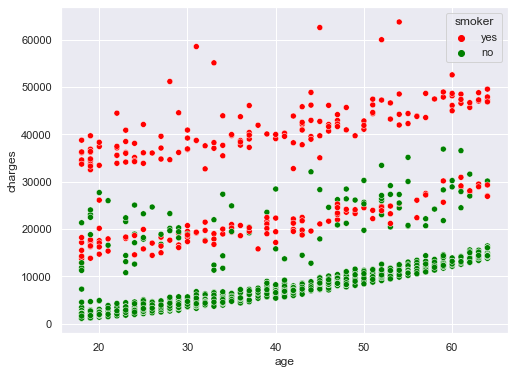

In [23]:
plt.figure(figsize=(8,6))  ##Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette=['red', 'green'])
plt.show()

Visually the difference between charges of smokers and charges of non-smokers is apparent

In [24]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


#### smokers are claim more money than non- smokers.

### Does bmi of males differ significantly from that of females?

In [25]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


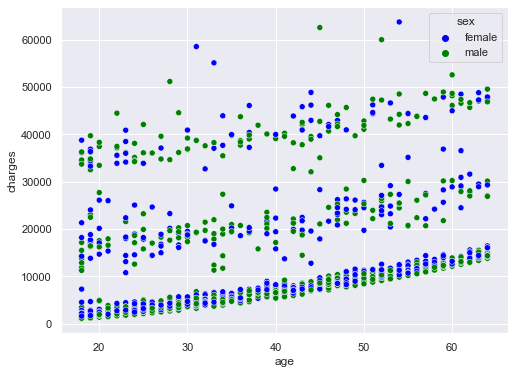

In [26]:
plt.figure(figsize=(8,6))  ##Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
sns.scatterplot(df.age, df.charges,hue=df.sex,palette=['blue', 'green'])
plt.show()

from the plot we can say that there is no apparent relation between gender and charges

In [27]:
# T-test to check dependency of gender on charges
Ho = "no effect for charges by gender "   # Stating the Null Hypothesis
Ha = "there is an effect for charges by gender"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].charges)  # Selecting charges corresponding to male as an array
y = np.array(df[df.sex == 'female'].charges) # Selecting charges corresponding to female as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

there is an effect for charges by gender as the p_value (0.03613272100592976) < 0.05


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


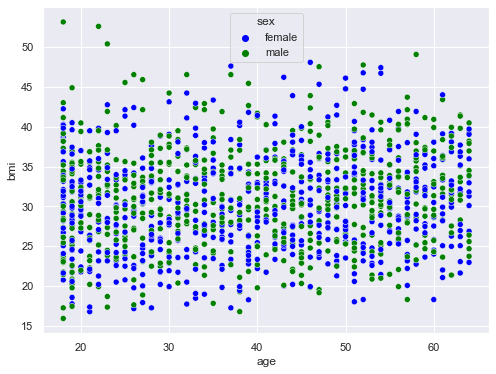

In [28]:
plt.figure(figsize=(8,6))  ##Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
sns.scatterplot(df.age, df.bmi,hue=df.sex,palette=['blue', 'green'])
plt.show()

 checking by running T-test for tha required data

In [29]:
# T-test to check dependency of bmi on gender
Ho = "no effect for bmi by gender "   # Stating the Null Hypothesis
Ha = "there is an effect for bmi by gender"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi corresponding to male as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi corresponding to female as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

no effect for bmi by gender  as the p_value (0.08997637178984932) > 0.05


#### we can say that bmi of both genders are identical

## Is the proportion of smokers significantly different in different genders?

here smokers and gender both are catagorical data, so we have to perform chi square test.

In [30]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes
                                                # we'll get a cross table of the sex with smokers numbers.
    
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab) # standared code for chi square test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females

In [31]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


* Smoking haboits of people of different regions are similar

#### Is the distribution of bmi across women with no children, one child and two children, the same ?

here we have to compare the more than two qunatities so we have to perform anova test for this. called oneway anova test.

In [32]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


#### *BMI is not changed by the number of children a women has

### Regression

depending variable is numarical. 
* liner regression - finding out the mathematical relationship b/w depending     and independent variable.
*  eg: let us consider 
    x    y
    1    10
    2    20
    3    30
    4    40
    5    50
   from this assume x=1,2,3,5 are train data and x=4 is test data. 
   
 * for finding the relation system will randomly assumes ycap = 5x and calculate the ycap values by passing the xvalues. then we'll get random ycap values,
 ycap = 5,10,15,20,25 find the error for this ycap values, error = (y-ycap)^2 and take the mean. 
 
 * next step system will consider two random equations for the given relation. like ycap = 6x and ycap = 4x simillarly it'll calculate the values for both and also calculate the error then we can see that error value is less for ycap = 6x and increases for ycap=4x. so system will consider that decrement of error and the depending variable like ycap = 6x, 7x, 8x, 9x, 10x. for ycap = 10x, (ycap = y) and the error is 0 for both the test data and train data. we'll be getting 100% score for both test and train.
 
 * if we plot the values of ycap = 10x then we'll get a liner st line with equation Y=mX+C with m=10 and C=0.
 * slope = m = how much does the y chnage when there is a unit change of x 
 * c=value of y when x=0 or value od y when there is no independent variable.
 * algorithm is 
    1) random guess
    2) updating the slope value
    3) so that we are try to minimising the error value.
    
 * types of regression:
    1) simple regression - y=mx+c, only one independent variable
    2) multiple regression - y=m1x1+m2x2+.......c, many independent variables.
    3) polynomial regression
 * for type 1 and type 2 we are fitting the regression into the stright line but some times we have to fit the regression data into the curve which is known as polynomial regression.
 * we are not using any type of regression in the industry.  
 * the error we got from this is caleed mean square error.
   1) root mean square error = root over mean square error.
   2) mean absolute error = [ 1/n summation of (|Yn-Yn cap|)]

### Example for linear regression


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [34]:
df = pd.DataFrame({"Area":[2500,3000,3500,4000,4500],"Price":[600000,700000,800000,880000,960000]})
df  # we are creating a dataset.

,Area,Price
0,2500,600000
1,3000,700000
2,3500,800000
3,4000,880000
4,4500,960000


In [35]:
df.head()

,Area,Price
0,2500,600000
1,3000,700000
2,3500,800000
3,4000,880000
4,4500,960000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    5 non-null      int64
 1   Price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [37]:
df.describe()

,Area,Price
count,5.000000,5.00000
mean,3500.000000,788000.00000
std,790.569415,142548.23745
min,2500.000000,600000.00000
25%,3000.000000,700000.00000
50%,3500.000000,800000.00000
75%,4000.000000,880000.00000
max,4500.000000,960000.00000


In [38]:
df.describe(include="all")

,Area,Price
count,5.000000,5.00000
mean,3500.000000,788000.00000
std,790.569415,142548.23745
min,2500.000000,600000.00000
25%,3000.000000,700000.00000
50%,3500.000000,800000.00000
75%,4000.000000,880000.00000
max,4500.000000,960000.00000


In [39]:
df.shape

(5, 2)

In [40]:
df.isnull().sum()

Area     0
Price    0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,5.0,3500.0,790.569415,2500.0,3000.0,3500.0,4000.0,4500.0
Price,5.0,788000.0,142548.237450,600000.0,700000.0,800000.0,880000.0,960000.0


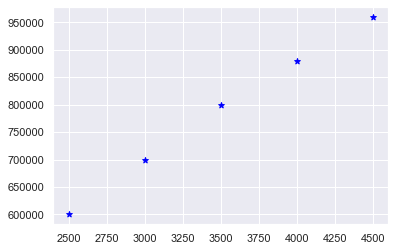

In [42]:
X=df[["Area"]]
Y=df[["Price"]]
plt.scatter(X,Y,marker="*",color="blue")

* there is some little diviation here.
* so i have to do linear regression.


In [43]:
reg=LinearRegression() # instantiating the model.


In [44]:
reg.fit(X,Y)

LinearRegression()

In [45]:
reg.coef_ # slope of the curve.

array([[180.]])

In [46]:
reg.intercept_ # getting the value of C 

array([158000.])

In [47]:
reg.predict([[3300]])

array([[752000.]])

In [48]:
y = (180 * 3300) + 158000 # y=mx+c, checking for the predicted value of x=3300
y

752000

## DAY 7

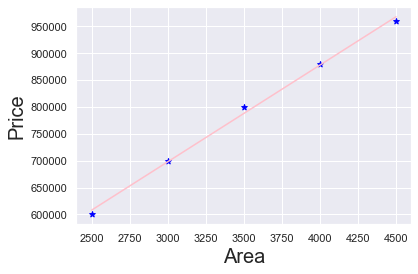

In [49]:
plt.xlabel("Area",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.scatter(df.Area,df.Price,color="blue",marker="*")
plt.plot(df.Area,reg.predict(df[["Area"]]),color="pink")

In [50]:
df_pred=pd.read_excel("Prediction values for Regression-1.xlsx") # we have to predict the prices of the area given in the excel file.

In [51]:
pred=reg.predict(df_pred)

In [52]:
df_pred["Price"]=pred # adding the price column to the excel file

In [53]:
df_pred.to_csv("Prediction values for Regression-1.csv", index=False)

 R^2 = 1 - mean square error / variance = 1 - { ( y-ycap)^2 / (y-ybar)^2} so, it tells about the % of variance explained by the model.
 * if R^2 value is closer to 1 than the given model is good model means [ (y-ycap)^2 = 0 ]. 
 
 * challande with R^2 is the value is rasing and tries to apporoch 1 by adding insignificant data to it means it is missleading us by approaching to 1. to avoid this use Adj R^2.
 
 * Adj R^2 = 1 - {(1-R^2)(n-1)/(n-p-1)}, n = n0 of observations or rows.
                                 p = no of features. 
 * if p value increases then denominator will decrease so then value in {} will increased and while subtracting the overall value gets decreased. and there will be change in R^2 too it'll increase when there is increase in p value. so adj R^2 <= R^2. (leass than or equal to). and AdjR^2 > R^2 is not at all possible.because we are detacting it from 1.
 * 

 #### what can be the out come of the dependent variable? it can be ranging from ( -infinity to +infinity) and from numerical it can be any data type like it can be float or int.
      

#### GD - grediant desent = all about the convergence theorem.

in linear regression finding of right direction and correct step size is more important.
* convergence theorem => new slope = old slope - { alpha (dL / dM)}
                         alpha = learning rate = step size.
                         (dL / dM) = slope in the error VS slope(m) curve.

### Example
##### establish the relationship between mpg and other attributes for the given data set.

* here mpg is the dependent variable. so it should be taken in the y-axis.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/auto-mpg.csv")

In [56]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [57]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


here is horsepower is showing as objet type which has to be int or float value so this is column is containing unhealthy data.
* from the above data we can drop the car name column beacause there is a different names for every datapoint and there are many attributes which can define that particular car model like cylinders, horsepower etc. so we can drop the car name. and based upon the name nothing is going to change.

In [59]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [60]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [61]:
df.shape

(398, 9)

In [62]:
df = df.drop('car name', axis = 1) #dropping/ignoring car_name.
df.head()                          # axis = 1 indicates the column.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [63]:
df['origin'] = df['origin'].replace({1:'america', 2:'europe', 3:'asia'})
df.sample(10) # replacing the origin values with the actual catagorical data.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
315,24.3,4,151.0,90,3003,20.1,80,america
206,26.5,4,140.0,72,2565,13.6,76,america
381,36.0,4,107.0,75,2205,14.5,82,asia
167,29.0,4,97.0,75,2171,16.0,75,asia
346,32.3,4,97.0,67,2065,17.8,81,asia
387,38.0,6,262.0,85,3015,17.0,82,america
353,33.0,4,105.0,74,2190,14.2,81,europe
176,19.0,6,232.0,90,3211,17.0,75,america
278,31.5,4,89.0,71,1990,14.9,78,europe
258,20.6,6,231.0,105,3380,15.8,78,america


In [64]:
# again we are getting origin as catagorical data so change that catagorical data to numarical by assigning values to them.
# use 'one hot encoding' we can change the catagorical data into numerical.

df = pd.get_dummies(df, columns=['origin'])
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
208,13.0,8,318.0,150,3940,13.2,76,1,0,0
303,31.8,4,85.0,65,2020,19.2,79,0,1,0
379,36.0,4,98.0,70,2125,17.3,82,1,0,0
177,23.0,4,115.0,95,2694,15.0,75,0,0,1
274,20.3,5,131.0,103,2830,15.9,78,0,0,1
223,15.5,8,318.0,145,4140,13.7,77,1,0,0
52,30.0,4,88.0,76,2065,14.5,71,0,0,1
396,28.0,4,120.0,79,2625,18.6,82,1,0,0
71,19.0,3,70.0,97,2330,13.5,72,0,1,0
227,19.0,6,225.0,100,3630,17.7,77,1,0,0


* value 1 indicates the particular country rest others all are 0

#### in the data there are some missing values that too hidden missing values.


In [65]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [66]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [68]:
df.dtypes # horsepower is missing means it does not seem to be recognized as a numerical column.

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [69]:
# finding for horsepower isdigit or ?, checking whether the missing column is missing digits or hiding values.
hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit()) #if digits is made of digits store true else false.
#print isDigit = False
df[hpIsDigit['horsepower'] == False] # it'll consider the rows where hp is false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [70]:
df = df.replace('?', np.nan) # so we got that missing values are ?
                             # so we are rplacing ? with NaN
df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [71]:
# insted of droping the missing value rows replace the missig values with the median
df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [72]:
# we need not to specify the column names below
# every column's missing value is replaced with that columns median respectively.

medianFiller = lambda x : x.fillna(x.median())
df = df.apply(medianFiller, axis = 0)

df['horsepower'] = df['horsepower'].astype('float64') # converting the hp column from object dtype to float dtype.
                                                      # because median value is float type.

In [73]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


#### BiVariate Plots

 a bivariate analysis among the different variables can be done using scatter mtrix plot. seaborn library create a dashboard reflecting useful information about the dimensions. the result can be stored as a .png file

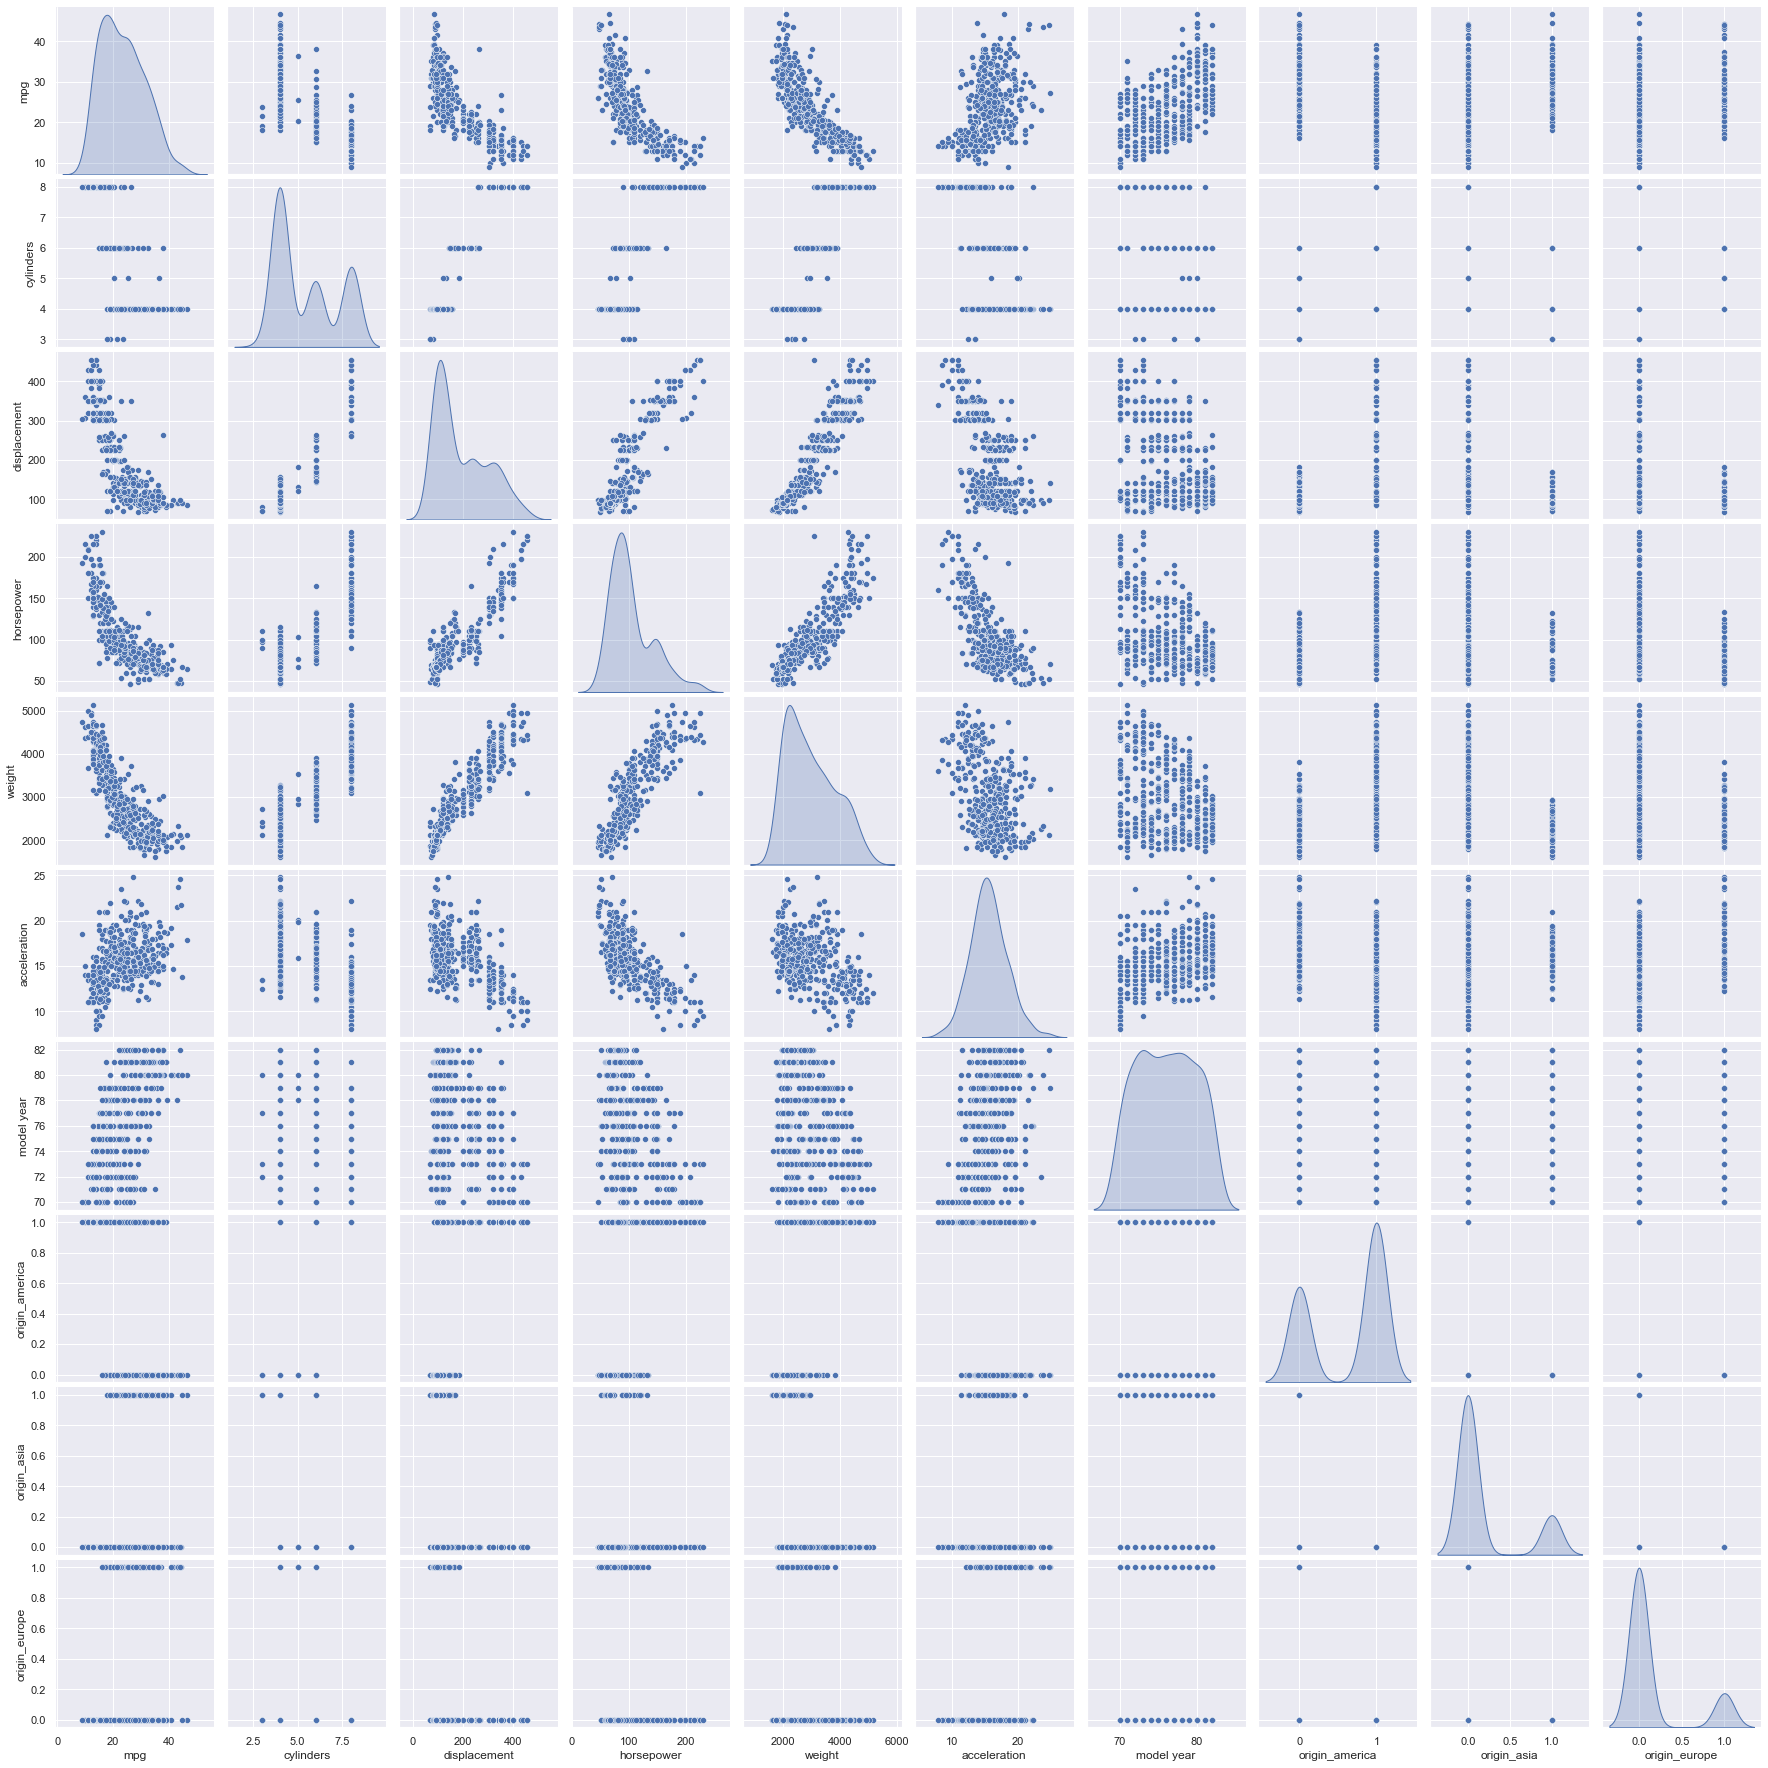

In [74]:
sns.pairplot(df, diag_kind = 'kde') # fixing the diagonals for the pairplot as kde plot insted of bar graphs.


observation between 'mpg and other attributes indicate the replationship is not really linear. however, the plots also indicate that linearly would sti;; capture quite a bit of useful information or pattern. several assumptions of classical linear regression seem to be violated.

#### Spliting the data

In [75]:
# lets build our linear model
# independent variables
x = df.drop(['mpg'], axis = 1)
# the dependent variable
y = df[['mpg']]

In [76]:
# split x and y into training and set in 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state = 0)
# test size is 30 means we are fixing that test data is 30% and random state = 1 means we are the fixing the random data. basically it doesn't make any sense whether we are mention or not, but to fix the data we have to mention it.

### Fit Linear model

In [77]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

 checking the r^2 score for in-sample and out of the sample.

In [78]:
reg_model.score(x_train,y_train)

0.8215521225570098

In [79]:
reg_model.score(x_test,y_test) #out of sample score

0.8226939742691545

In [81]:
# checking the polynomial 

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True) # we can change the degree and see with which curve we are getting the better model.
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train) # we are transfering the data into polynomial data for x and y remains as it is.

y_pred = poly_clf.predict(x_test2)

#print(y_pred)

#in sample (training) R^2 will always improve with the number of variables.

print(poly_clf.score(x_train2,y_train))

0.9044323619674877


In [82]:
# out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(x_test2,y_test))

0.8638436398288795


* overfitting model -  model well performed with train data and it performs badly with the test data.
* underfitting model - model does not perform with train data and also with test data it do not perform well.
* grnerallised model - for example we get 0.75 with train data and with 0.73 test data we can consider this as a best fitting model.

* bias - basically deals with error so always we have to try to get low bias.